In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv("C:/Users/joshi/Downloads/train_and_test2.csv")  
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [4]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [10]:
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())

if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

if 'Fare' in df.columns:
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())

if 'Cabin' in df.columns:
    df['Cabin'] = df['Cabin'].fillna("Unknown")
else:
    print("Column 'Cabin' not found in the dataset.")


Column 'Cabin' not found in the dataset.


In [13]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode 'Sex' column if it exists
if 'Sex' in df.columns:
    le = LabelEncoder()
    df['Sex'] = le.fit_transform(df['Sex'])

# One-hot encode 'Embarked' column if it exists
if 'Embarked' in df.columns:
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
else:
    print("Column 'Embarked' not found in the dataset.")


Column 'Embarked' not found in the dataset.


In [15]:
# Step 6: Feature Scaling

scaler = StandardScaler()

# Create new scaled columns
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']])
df['Age_scaled'] = scaler.fit_transform(df[['Age']])


In [16]:
# Step 7: Detect and Remove Outliers

# Use IQR method for Fare
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]


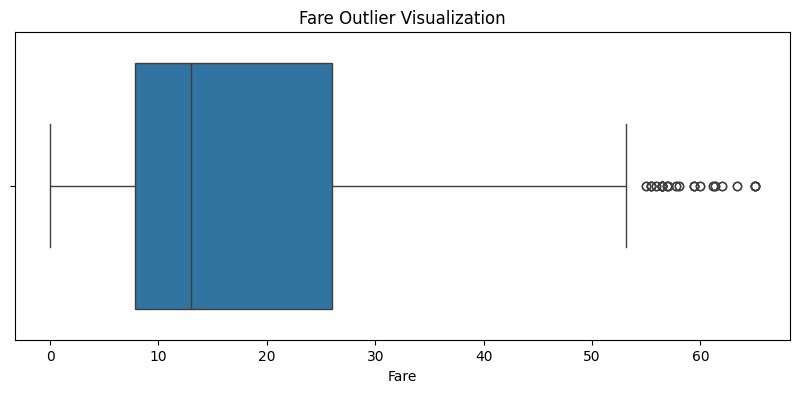

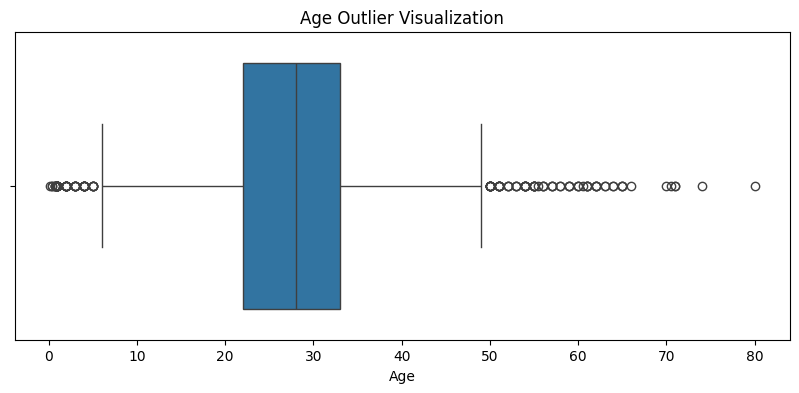

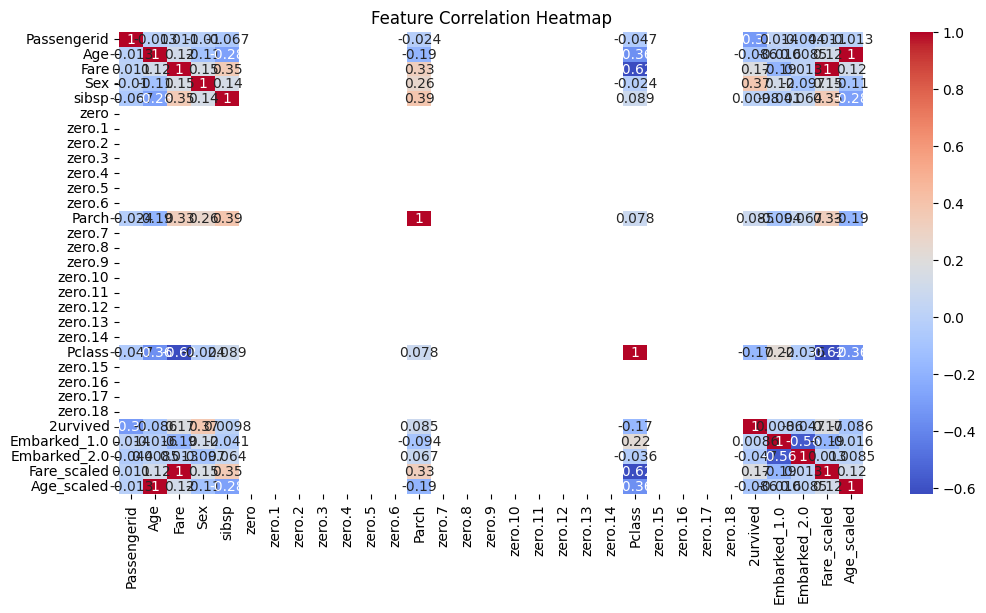

In [17]:
# Step 8: Visualization

# Boxplots for outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Fare'])
plt.title("Fare Outlier Visualization")
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Age'])
plt.title("Age Outlier Visualization")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
